In [61]:
%run ./Classes/Create_Folder_Notebook.ipynb
%run ./Classes/Homography_Process_notebook.ipynb
%matplotlib notebook

<IPython.core.display.Javascript object>


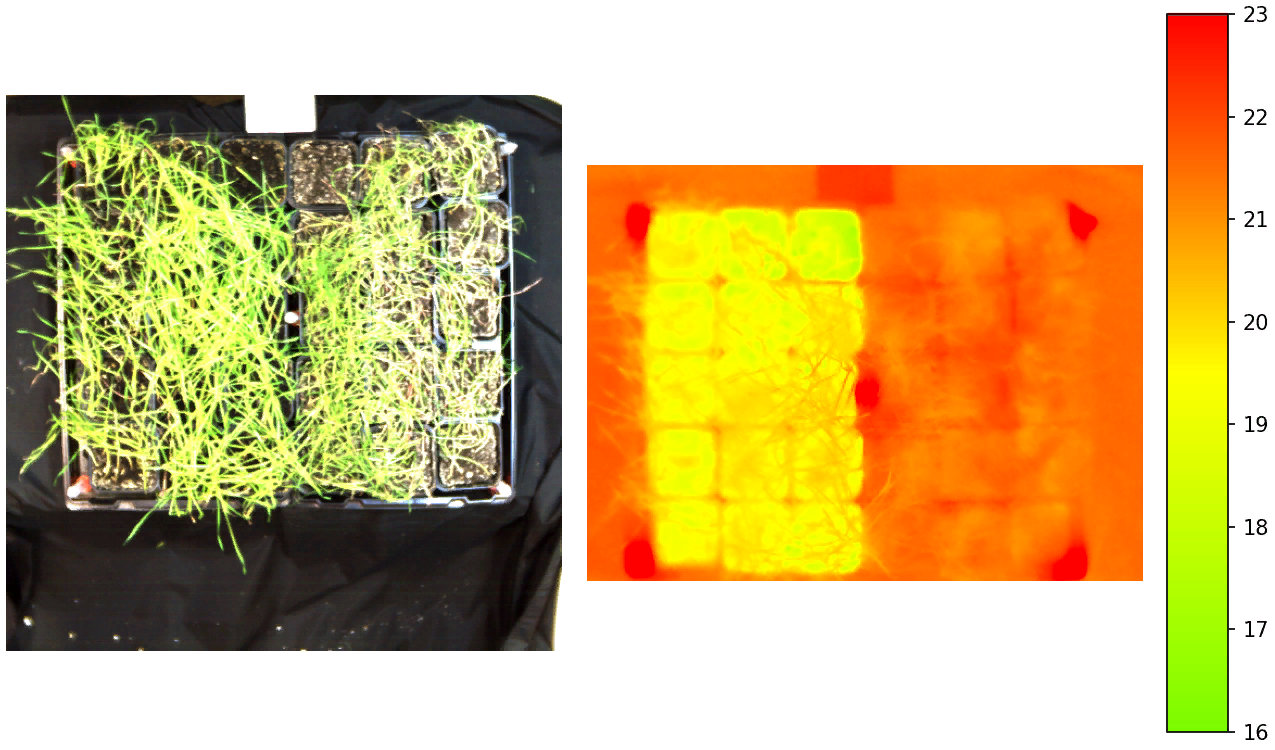

Размер RGB: (512, 512, 3), Минимум: 0, Максимум: 255
Размер TIR: (240, 320), Минимум: 17.3490829467773, Максимум: 37.1931686401367


In [62]:
# Открытие RGB (соответствующего HSI) и TIR изображения, их визуализация
# Если TIR повернуто на 180 градусов относительно RGB, присвоить rot_tir_flag значение True

h = Homography_Process(folder = 25, number = 1, angle = 90, path_hsi = 'HSI_90', path_tir = 'TIR_90')
h.Load_RGB_TIR(rot_tir_flag=False)

<IPython.core.display.Javascript object>


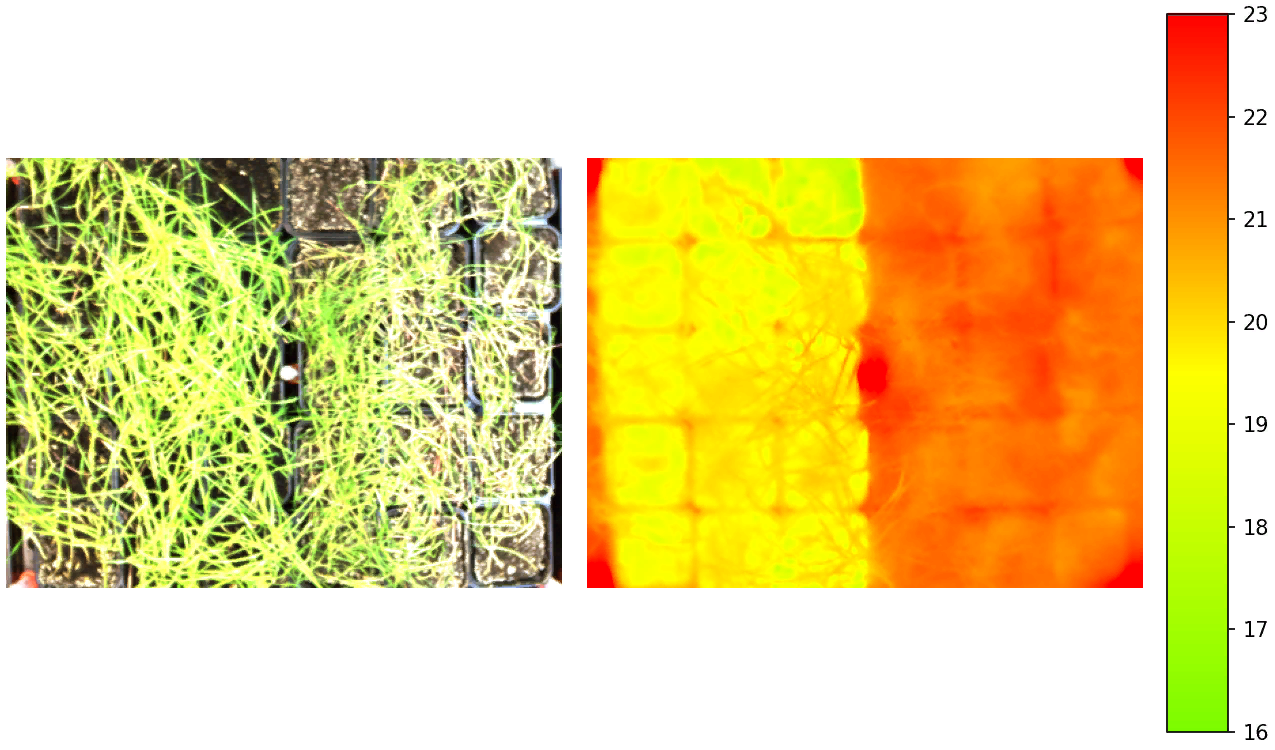

Размер RGB: (316, 409, 3), Минимум: 0, Максимум: 255
Размер TIR: (316, 409), Минимум: 17.364038944244367, Максимум: 36.73235486447815


In [63]:
# По изображениям сверху выбираем точки совмещения на лампах (или около ламп, или для углов коробки).
# Изображения являются интерактивным элементом, поэтому их возможно приближать для увеличения точности (кнопка "Zoom").
# При наведении мышки на пиксель, в правом нижнем углу изображения написаны x и y - координаты его столбца и строки.
# Выбранные x и y необходимо ввести в виде целых чисел в Point_rgb (для левого изображения) и Point_tir (для правого).
# Выбранные точки совмещения вводятся по очереди: лев.верх., прав.верх., прав.низ, лев.низ, центр. 
# Точки хранятся в двумерном списке вида: [[x1, y1], [x2, y2], ..., [x5, y5]].

Point_rgb = np.array([
    [55, 51],
    [464, 47],
    [458, 363],
    [61, 365],
    [262, 204]
])


Point_tir = np.array([
    [29, 30],
    [286, 33],
    [281, 232],
    [29, 230],
    [160, 131]
])


h.Convergence(Point_rgb, Point_tir, crop_pix=0)

<IPython.core.display.Javascript object>


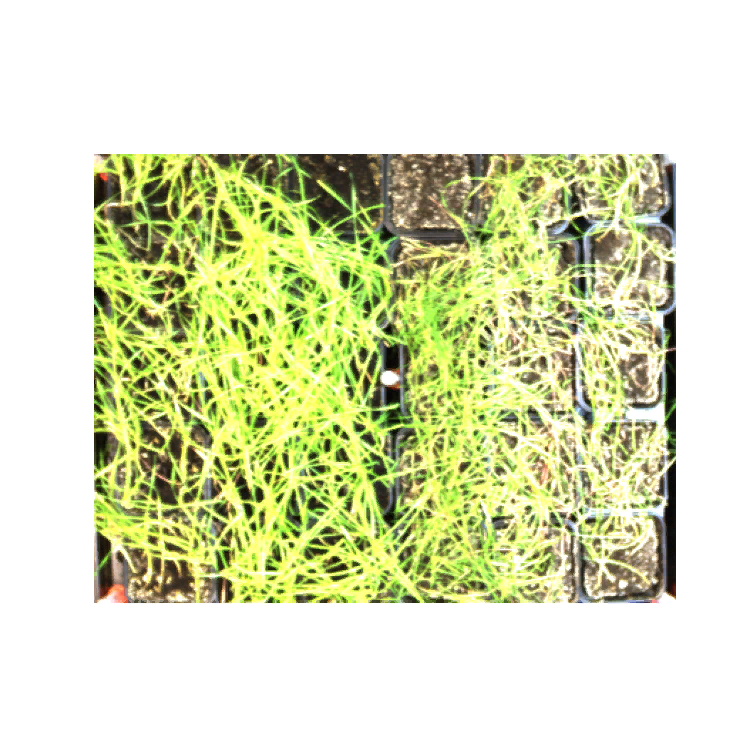

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Размер HSI: (316, 409, 204)


In [64]:
# Загружаем HSI, отображаем его и контроллируем правильный поворот за счет параметра k_rot
# Отображаемое псевдо-RGB должно быть идентично повернуто, как и RGB изображение выше

h.Load_HSI(k_rot=3)

In [65]:
# Сохраняем HSI, TIR, RGB как массивы numpy
# Если сухая сторона находится справа, то flag_rot=False, если слева - True (можно определить визуально по TIR снимкам)

h.Save(path_out = 'TIR + HSI 90', flag_rot=True)